In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
datapath = "../../data/statefarm/sample/"

In [5]:
sz = 224

In [7]:
data = ImageClassifierData.from_paths(datapath, tfms=tfms_from_model(None, sz = sz))

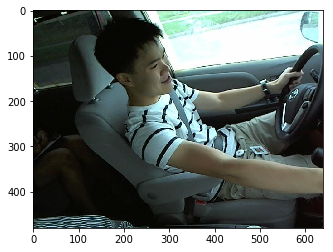

In [10]:
img = plt.imread(datapath + data.trn_ds.fnames[500])
plt.imshow(img)

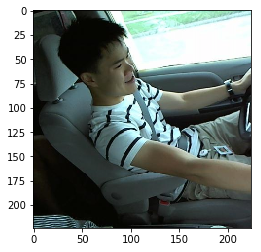

In [11]:
img_n = data.trn_ds.denorm(data.trn_ds[500][0])[0]
plt.imshow(img_n)

In [13]:
m = nn.Sequential(
      Flatten(),
      nn.Linear(3*224*224, 10),
      nn.LogSoftmax()
)

In [14]:
learn = ConvLearner.from_model_data(m, data)

In [16]:
learn.fit(0.001, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[   0.        88.83906  395.16782    0.30469]             
[   1.        63.8972   360.9566     0.29004]             
[   2.        47.24824  347.52353    0.30215]             



In [17]:
preds = learn.predict()
predcat = np.argmax(preds, axis = 1)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.trn_ds.y, predcat)

[[21  5  8  6  3  0  3 16 10 28]
 [ 1 29 12  6  0  0 16 31  1  4]
 [ 0  0 21  1  0  0 28 42  1  7]
 [ 0  6  8 34  0  1  8 15  5 23]
 [ 5  0 18 17  9  1  4 29  5 12]
 [ 0  0  4 10  2 22 16 35  3  8]
 [ 0  1 21  2  0  0 51 15  4  6]
 [ 0  3  7  0  0  1  5 69  2 13]
 [ 0  1 12  0  1  6 23 24 20 13]
 [ 4  4  4  6  2  4  5 41  2 28]]


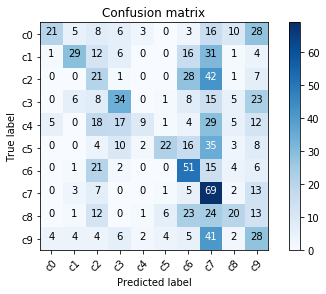

In [19]:
plot_confusion_matrix(cm, data.classes)

In [22]:
learn = ConvLearner.from_model_data(m, data)

In [ ]:
learn.fit(0.001, 3, wds = 0.01)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[   0.        22.14247  328.31354    0.30469]             
[   1.        20.42478  324.62012    0.30488]             
  0%|          | 0/16 [00:00<?, ?it/s]

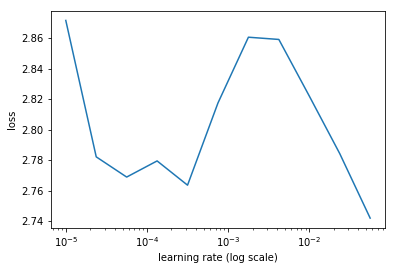

In [37]:
learn.sched.plot(n_skip=0)

In [41]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [42]:
data = ImageClassifierData.from_paths(datapath, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [48]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[      0.        11160.54731  541259.            0.40039]    
[       1.         10114.69115  1433709.5            0.41367]
[       2.         10164.04482  2973561.             0.41953]
[       3.          9878.06226  8196810.             0.43438]
[      4.         9314.68806  628992.            0.42949]    

